In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [12]:
df = pd.read_csv(r'C:\Users\HP\Desktop\datasets\Kaggleplayground 2\train.csv')

In [108]:
df.head()

(300000, 14)

In [13]:
df1 = df.copy()
df2 = df.copy()

In [14]:
df.set_index('id', inplace = True)
df.index.name = None
target = df['target']
df.drop(columns={'target'},inplace = True)

In [15]:
df.head()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
1,0.670390,0.811300,0.643968,0.291791,0.284117,0.855953,0.890700,0.285542,0.558245,0.779418,0.921832,0.866772,0.878733,0.305411
3,0.388053,0.621104,0.686102,0.501149,0.643790,0.449805,0.510824,0.580748,0.418335,0.432632,0.439872,0.434971,0.369957,0.369484
4,0.834950,0.227436,0.301584,0.293408,0.606839,0.829175,0.506143,0.558771,0.587603,0.823312,0.567007,0.677708,0.882938,0.303047
5,0.820708,0.160155,0.546887,0.726104,0.282444,0.785108,0.752758,0.823267,0.574466,0.580843,0.769594,0.818143,0.914281,0.279528
8,0.935278,0.421235,0.303801,0.880214,0.665610,0.830131,0.487113,0.604157,0.874658,0.863427,0.983575,0.900464,0.935918,0.435772


In [9]:
df.isnull().sum()

cont1     0
cont2     0
cont3     0
cont4     0
cont5     0
cont6     0
cont7     0
cont8     0
cont9     0
cont10    0
cont11    0
cont12    0
cont13    0
cont14    0
dtype: int64

In [18]:
df1.corr()['target']

id        0.001347
cont1    -0.032994
cont2     0.067102
cont3     0.058936
cont4     0.005522
cont5    -0.005358
cont6     0.027955
cont7     0.067234
cont8     0.014698
cont9    -0.013029
cont10   -0.021143
cont11    0.050996
cont12    0.047809
cont13   -0.006642
cont14   -0.006609
target    1.000000
Name: target, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(df,target,test_size = 0.3, random_state = 1)
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()

In [25]:
xtrain_s = standard_scaler.fit_transform(xtrain)
xtest_s = standard_scaler.transform(xtest)
xtrain_mm = minmax_scaler.fit_transform(xtrain)
xtestmm = minmax_scaler.transform(xtest)

In [28]:
target1 = target.copy()
target2 = target.copy()
target3 = target.copy()
target4 = target.copy()

In [43]:
ytrain_s = standard_scaler.fit_transform(ytrain.values.reshape(-1,1))
ytest_s = standard_scaler.transform(ytest.values.reshape(-1,1))

ytrain_mm = standard_scaler.fit_transform(ytrain.values.reshape(-1,1))
ytest_mm = standard_scaler.transform(ytest.values.reshape(-1,1))

## Linear Regression for base comparison

In [44]:
lr1 = LinearRegression()

In [45]:
lr1.fit(xtrain_s,ytrain_s)
yhat_lr1 = lr1.predict(xtest_s)

In [46]:
from sklearn.metrics import r2_score

In [47]:
from sklearn.metrics import mean_absolute_error

In [57]:
print(r2_score(ytest_s,yhat_lr1))

0.01827186223521826


In [63]:
print(mean_absolute_error(ytest,yhat_lr1))

7.906651916344003


In [51]:
xtrain = standard_scaler.fit_transform(xtrain)
xtest = standard_scaler.transform(xtest)

In [53]:
lr2 = LinearRegression()

In [54]:
lr2.fit(xtrain,ytrain)
yhat_lr2 = lr2.predict(xtest)

In [55]:
print(r2_score(ytest,yhat_lr2)) #scaling the independent variables doesn't affect the r2 score

0.018271862235218483


## XGB Regressor

In [58]:
xgbr1 = XGBRegressor()

In [60]:
xgbr1.fit(xtrain,ytrain)
yhat_xgbr1 = xgbr1.predict(xtest)

In [61]:
print(r2_score(ytest,yhat_xgbr1))

0.07667406873960225


In [62]:
print(mean_absolute_error(ytest,yhat_xgbr1))

0.5890093803468027


In [137]:
## testing model with standardized data

In [139]:
xgbr2 = XGBRegressor()
xgbr2.fit(xtrain_s,ytrain_s)
yhat_xgbr2 = xgbr2.predict(xtest_s)
print(mean_absolute_error(ytest_s,yhat_xgbr2))

0.8028628037107177


In [68]:
import matplotlib.pyplot as plt

In [111]:
imp = xgbr1.feature_importances_ #feature importance given by xgboost

<BarContainer object of 14 artists>

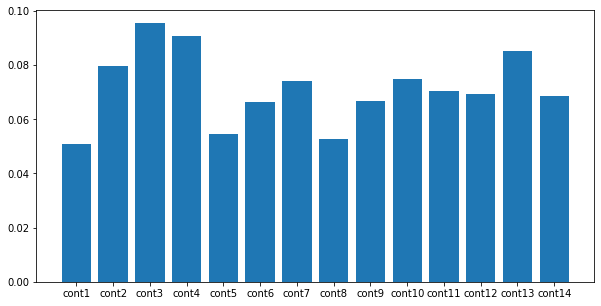

In [120]:
plt.figure(figsize = (10,5))
plt.bar(df.columns, height = imp)

In [79]:
df1.corr(method = 'pearson')['target']

id        0.001347
cont1    -0.032994
cont2     0.067102
cont3     0.058936
cont4     0.005522
cont5    -0.005358
cont6     0.027955
cont7     0.067234
cont8     0.014698
cont9    -0.013029
cont10   -0.021143
cont11    0.050996
cont12    0.047809
cont13   -0.006642
cont14   -0.006609
target    1.000000
Name: target, dtype: float64

In [81]:
from scipy import stats

In [109]:
for col in df1:
    p_corr,p_value = stats.pearsonr(df1[col],df1['target'])
    print(col,p_corr, p_value)

id 0.0013472175150167265 0.46057601958572125
cont1 -0.03299369853768816 4.90416102128356e-73
cont2 0.06710170146632899 2.2661690671771178e-296
cont3 0.05893621104572727 5.289526554633656e-229
cont4 0.005521566713620659 0.002492115796936273
cont5 -0.005357507308154698 0.0033415398916062126
cont6 0.027954591472273527 6.137930686379651e-53
cont7 0.06723394722080087 1.5555871510246505e-297
cont8 0.014698315898562311 8.211993908287938e-16
cont9 -0.013028626444752563 9.584477084822728e-13
cont10 -0.021142885587589547 5.103499345059516e-31
cont11 0.0509959665682284 6.645998729015501e-172
cont12 0.047808664884640306 2.6051582149609596e-151
cont13 -0.006641642628204178 0.0002749742043894707
cont14 -0.006609220044238102 0.0002945536572591356
target 0.999999999999996 0.0


In [ ]:
## since p_value of all the independent variables in <0.05, so using sfs to confirm important features

In [123]:
lr2 = LinearRegression()
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(lr2,n_features_to_select = 13)
sfs.fit(df,target)

SequentialFeatureSelector(estimator=LinearRegression(), n_features_to_select=13)

In [127]:
sfs.get_support(indices = True)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

## Lasso Regression

In [128]:
from sklearn.linear_model import Lasso

In [129]:
lasso_reg1 = Lasso()

In [130]:
lasso_reg1.fit(xtrain,ytrain)
yhat_lasso1 = lasso_reg1.predict(xtest)

In [131]:
print(mean_absolute_error(ytest,yhat_lasso1))

0.6192268600598944


In [132]:
lasso_reg2 = Lasso(alpha = 0.3)

In [133]:
lasso_reg2.fit(xtrain_s,ytrain_s)
yhat_lasso2 = lasso_reg2.predict(xtest_s)
print(mean_absolute_error(ytest_s,yhat_lasso2))

0.8445878922324795
